# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

In [2]:
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

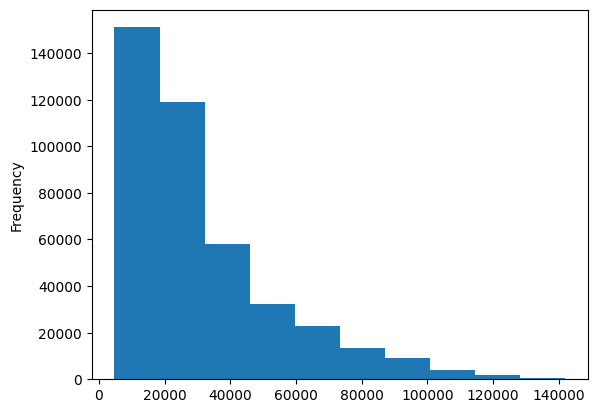

In [3]:
df['SalePrice'].plot.hist()

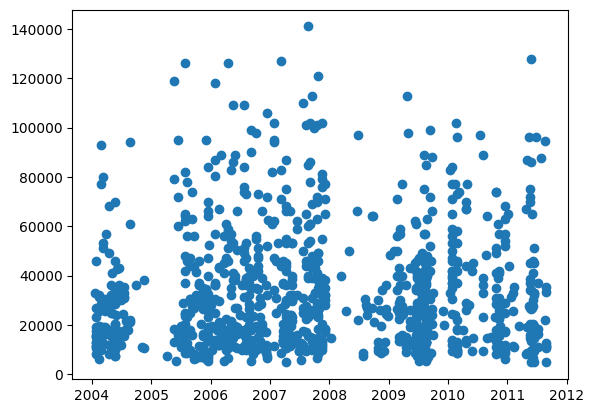

In [4]:
fig , ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [5]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [6]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [7]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [8]:
df_tmp = df.copy()

In [9]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
def preprocess_dfs(df):
    df['saleDay'] = df.saledate.dt.day
    df['saleMonth'] = df.saledate.dt.month
    df['saleYear'] = df.saledate.dt.year
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear

    df.drop('saledate',axis=1,inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1 # Null values have -1, so neutralizing the negative values to 0

    return df

In [11]:
df_tmp = preprocess_dfs(df_tmp)

In [12]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [13]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


<h2>Modelling</h2>

In [15]:
df_val = df_tmp[df_tmp['saleYear'] == 2012]
df_train = df_tmp[df_tmp['saleYear'] != 2012]


len(df_train),len(df_val)

(401125, 11573)

In [16]:
X_train, y_train = df_train.drop('SalePrice',axis=1),df_train.SalePrice
X_val, y_val = df_val.drop('SalePrice',axis=1),df_val.SalePrice

In [17]:
def rmsle(y_test, y_preds):
    return(mean_squared_log_error(y_true=y_test,y_pred=y_preds,squared=False))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {
        'Training MAE' : mean_absolute_error(y_train,train_preds),
        'Valid MAE': mean_absolute_error(y_val,val_preds),
        'Training RMSLE' : rmsle(y_train,train_preds),
        'Valid RMSLE': rmsle(y_val,val_preds),
        'Training R^2' : r2_score(y_train,train_preds),
        'Valid R^2': r2_score(y_val,val_preds),
    }

    return scores

In [18]:
better_fit_model = RandomForestRegressor(n_jobs=-1)

In [19]:
better_fit_model.fit(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])

RandomForestRegressor(n_jobs=-1)

In [20]:
better_fit_model.score(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])

0.9875793339756085

In [21]:
show_scores(better_fit_model)

{'Training MAE': 1576.5526840560922,
 'Valid MAE': 1864.242861142314,
 'Training RMSLE': 0.08410820556203157,
 'Valid RMSLE': 0.08657453749239467,
 'Training R^2': 0.9875878476264655,
 'Valid R^2': 0.987053341328511}

In [22]:
exp_model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)
exp_model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [23]:
show_scores(exp_model)

{'Training MAE': 5560.196994802119,
 'Valid MAE': 7149.5038546617125,
 'Training RMSLE': 0.25778619742858433,
 'Valid RMSLE': 0.29225959234082205,
 'Training R^2': 0.860739839617666,
 'Valid R^2': 0.8332181632267017}

In [24]:
grid = {
    'n_estimators':np.arange(10,100,10),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features':[0.5,1,'sqrt'],
    'max_samples':[10000]
}

rscv = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=True)

rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [25]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [26]:
show_scores(rscv)

{'Training MAE': 7295.863216311694,
 'Valid MAE': 8916.66899173473,
 'Training RMSLE': 0.32360769897218483,
 'Valid RMSLE': 0.36519940720263044,
 'Training R^2': 0.7753151163355355,
 'Valid R^2': 0.7674353501585169}

In [27]:
fast_pace_model = RandomForestRegressor(
    n_estimators=40,
    min_samples_split=8,
    min_samples_leaf=3,
    max_samples=10000,
    max_features=0.5,
    max_depth=None
)

fast_pace_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=40)

In [37]:
show_scores(fast_pace_model)

{'Training MAE': 5919.991723164513,
 'Valid MAE': 7296.247497124875,
 'Training RMSLE': 0.2705656516148958,
 'Valid RMSLE': 0.29692540615786533,
 'Training R^2': 0.8434523113966751,
 'Valid R^2': 0.8275257582873653}

<h2>Predictions

In [28]:
df_test = pd.read_csv(r'data/Test.csv',
                 low_memory=False,
                 parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [29]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [30]:
df_test['saleDay'] = df_test.saledate.dt.day
df_test['saleMonth'] = df_test.saledate.dt.month
df_test['saleYear'] = df_test.saledate.dt.year
df_test['saleDayOfWeek'] = df_test.saledate.dt.dayofweek
df_test['saleDayOfYear'] = df_test.saledate.dt.dayofyear

df_test.drop('saledate',axis=1,inplace=True)

df_test['auctioneerID_is_missing'] = [False]*len(df_test)

# Fill numeric rows with the median
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"] = pd.isnull(content)
            df_test[label] = content.fillna(content.median())

    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+'_is_missing'] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes + 1 # Null values have -1, so neutralizing the negative values to 0

In [31]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [32]:
test_preds = fast_pace_model.predict(df_test)

In [33]:
df_preds = pd.DataFrame({
    'SalesID':df_test['SalesID'],
    'SalePrice' : test_preds
})
df_preds.head()

,SalesID,SalePrice
0,1227829,18511.130952
1,1227844,22695.029762
2,1227847,53934.136905
3,1227848,63256.875000
4,1227863,38475.029762


In [34]:
df_preds.to_csv(r'data/predictions.csv',index=False)

<h2>Feature Importance

In [35]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

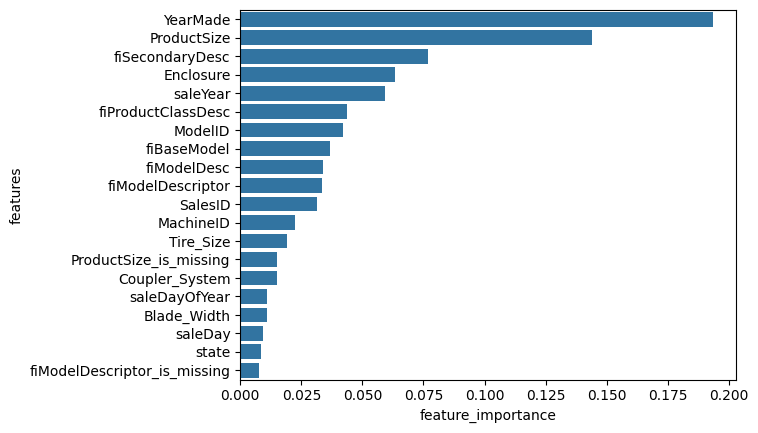

In [36]:
plot_features(X_train.columns, fast_pace_model.feature_importances_)